In [1]:
import scanpy as sc
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
dataset = 'Lung'
methods_path = "/home/krushna/Documents/Data_integration/Othermethods/"
batch_key_dic = {'Immune_human' : 'batch',
                 'Immune_human_mouse' : 'batch',
                 'Lung' : 'batch',
                 'Mouse_brain' : 'batch',
                 'Pancreas' : 'tech',
                 'Simulation1' : 'Batch',
                 'Simulation2' : 'Batch',
                 'Pancreas_scDGN' : 'batch',
                 'Mouse_Brain_scDGN' : 'batch',
                 'tabular_muris' : "batch",
                 'Human_Mouse' : 'batch'
                 
                }
cell_type_key_dic = {'Immune_human' : 'final_annotation',
                 'Immune_human_mouse' : 'final_annotation',
                 'Lung' : 'cell_type',
                 'Mouse_brain' : 'cell_type',
                 'Pancreas' : 'celltype',
                 'Simulation1' : 'Group',
                 'Simulation2' : 'Group',
                 'Pancreas_scDGN' : 'cell_type',
                 'Mouse_Brain_scDGN' : "tissue" ,
                 "tabular_muris" : "cell_ontology_class",
                 'Human_Mouse' : "celltype"
                    }    
batch = batch_key_dic[dataset]
cell_type = cell_type_key_dic[dataset]

# bbknn

In [27]:
adata_int = sc.read_h5ad(methods_path + "bbknn/bbknn-"+dataset+".h5ad")
adata_int.obs['Celltype'] = adata_int.obs[cell_type]
adata_int.obs['Batch'] = adata_int.obs[batch]

In [28]:
sc.tl.umap(adata_int)

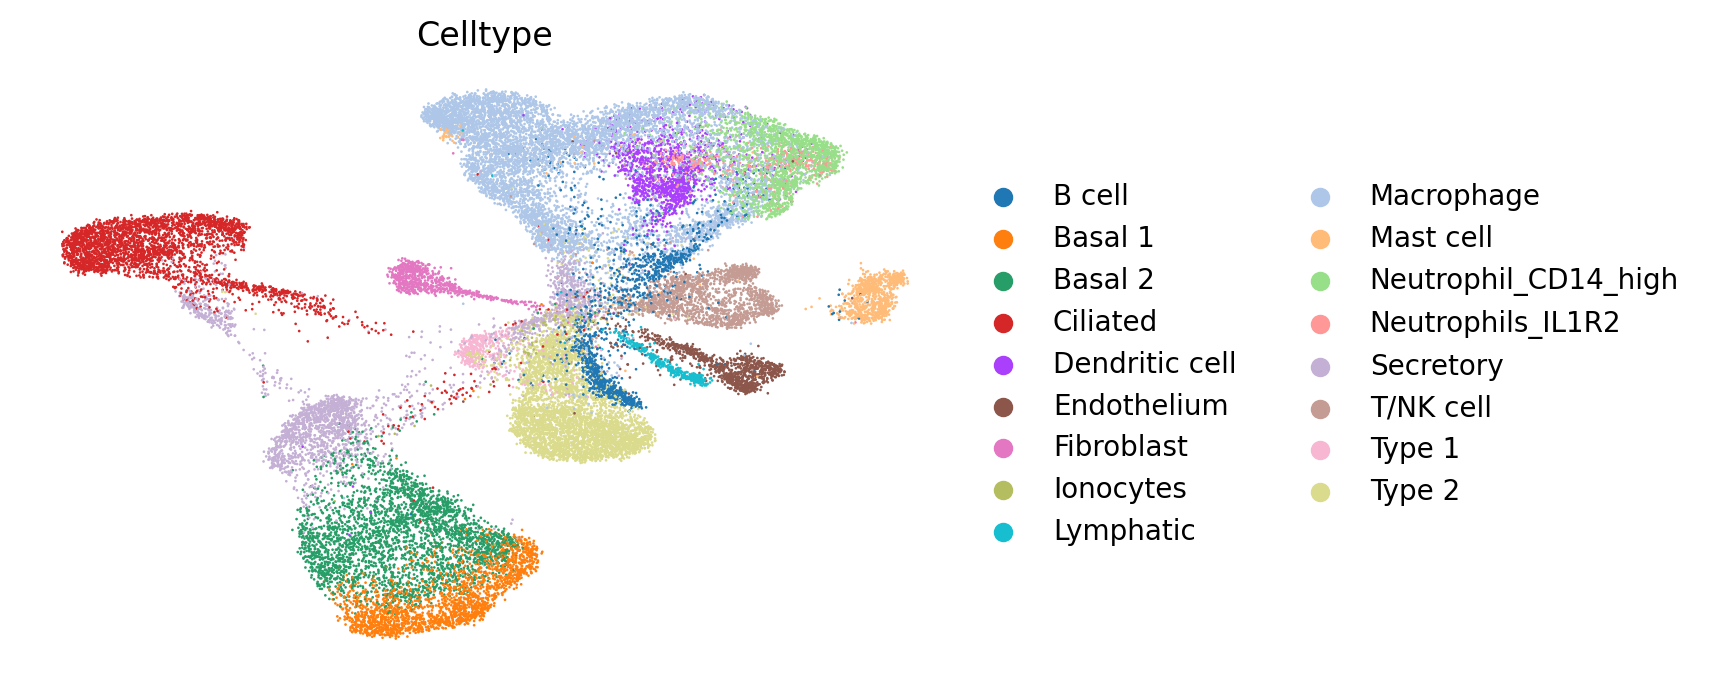

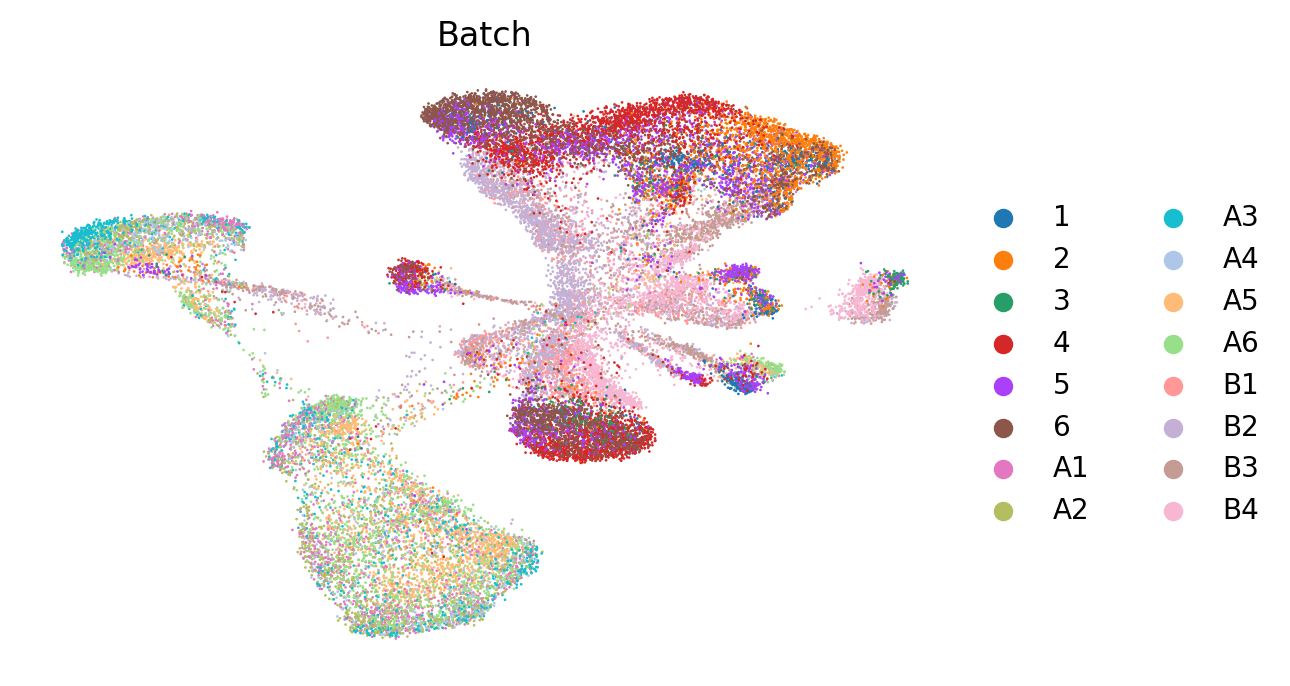

In [29]:
sc.pl.umap(adata_int, color="Celltype", frameon=False)
sc.pl.umap(adata_int, color="Batch", frameon=False)

# scvi

In [37]:
adata = sc.read_h5ad(methods_path + "scvi/scvi-"+dataset+".h5ad")
adata.obs['Celltype'] = adata.obs[cell_type]
adata.obs['Batch'] = adata.obs[batch]

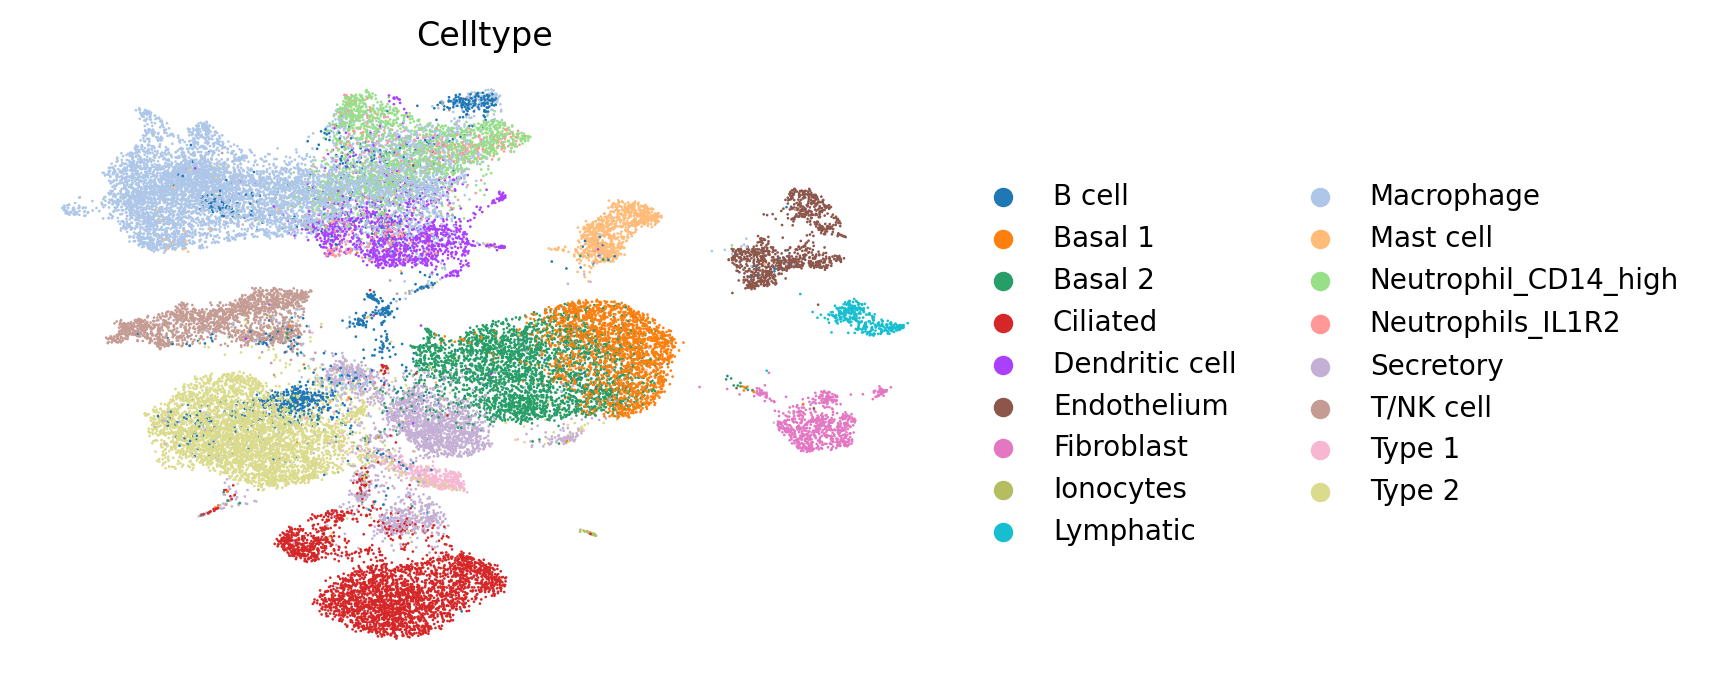

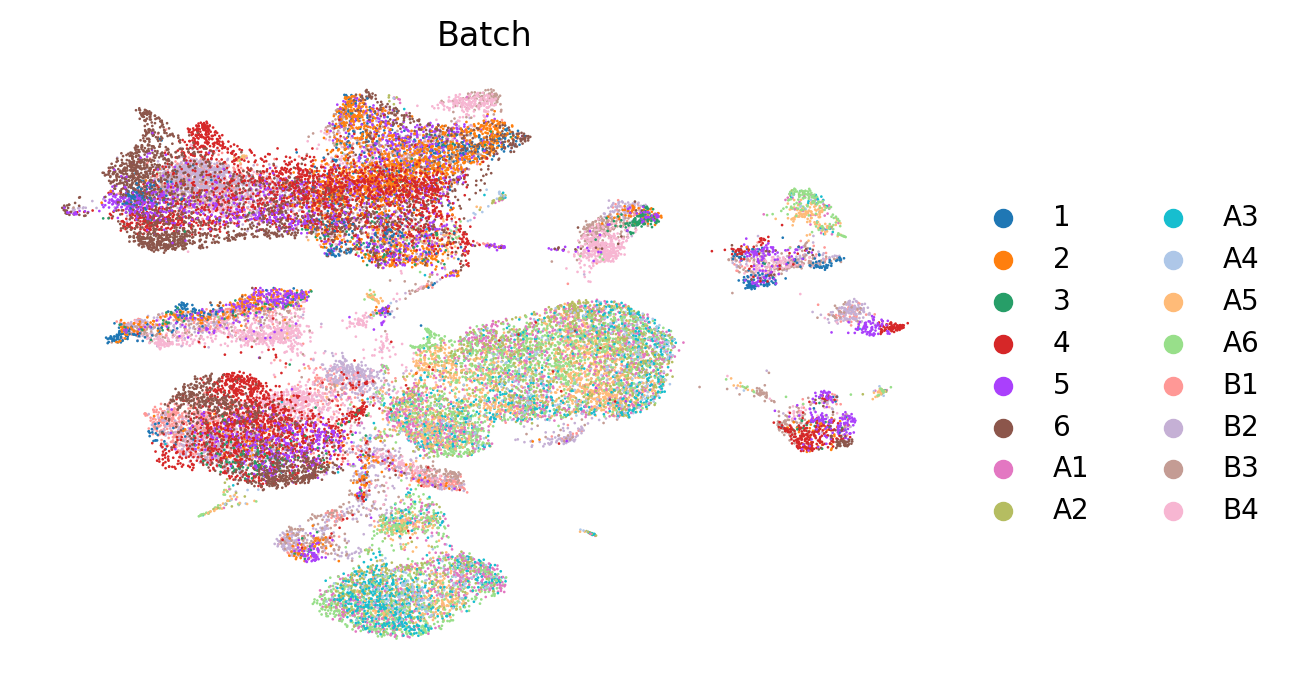

In [38]:
sc.pp.neighbors(adata, use_rep='X_scVI')  # use_rep = 'final_embeddings'
sc.tl.umap(adata)
sc.pl.umap(adata, color="Celltype", frameon=False)
sc.pl.umap(adata, color="Batch", frameon=False)

# harmony

In [31]:
adata = sc.read_h5ad(methods_path + 'harmony/harmony-'+dataset+'.h5ad')
adata.obs['Celltype'] = adata.obs[cell_type]
adata.obs['Batch'] = adata.obs[batch]

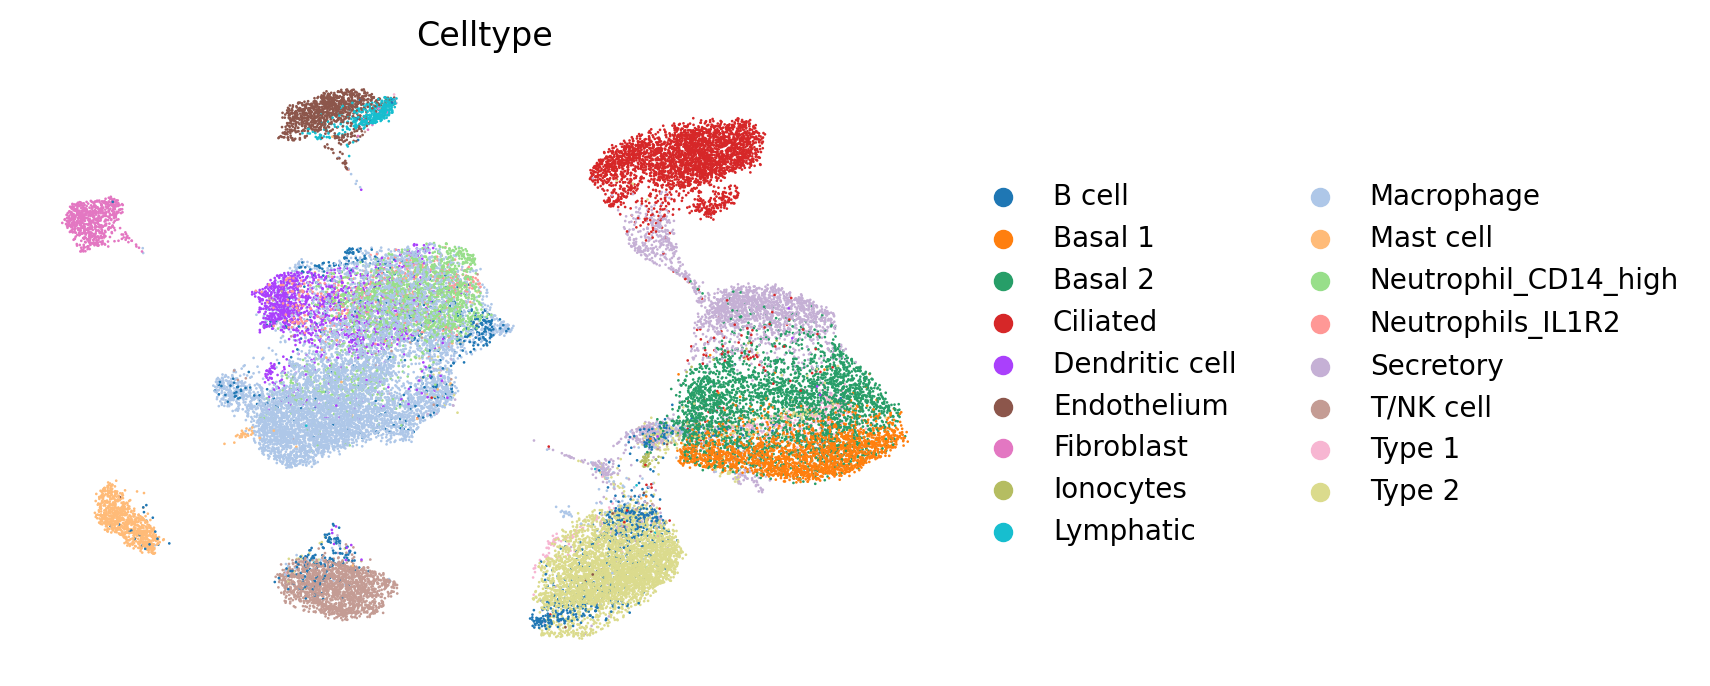

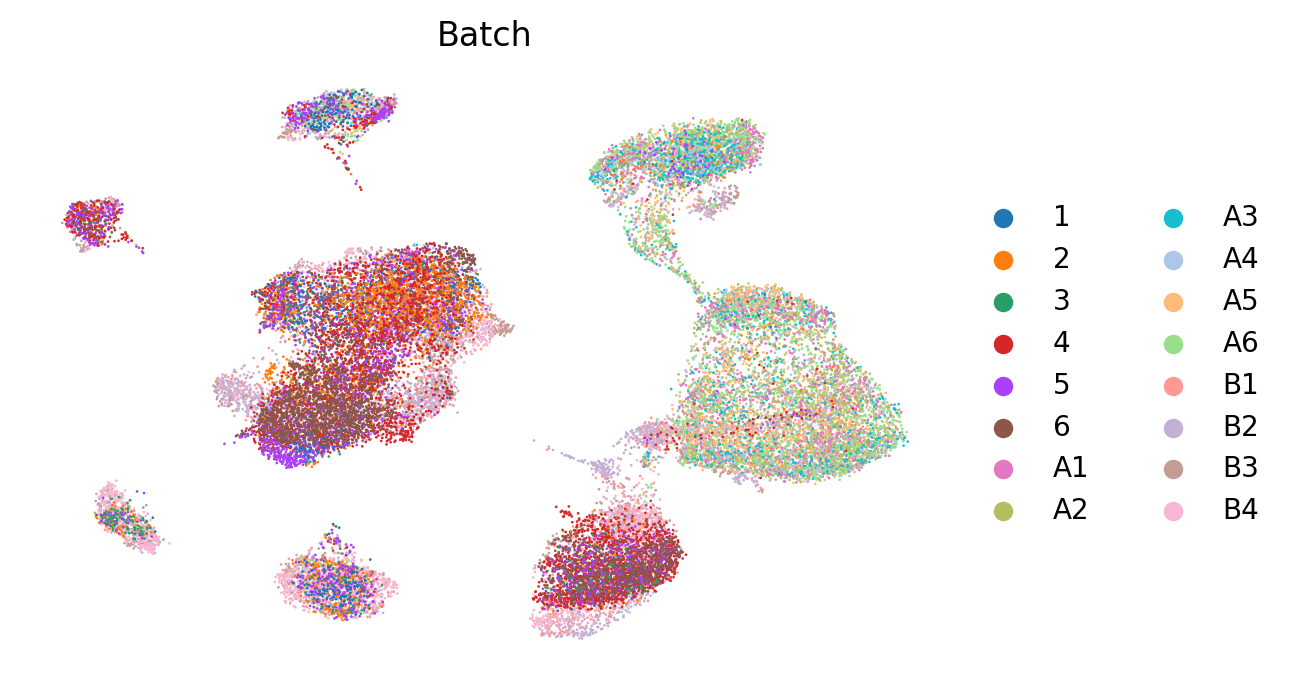

In [32]:
sc.pp.neighbors(adata, use_rep='X_harmony')  # use_rep = 'final_embeddings'
sc.tl.umap(adata)
sc.pl.umap(adata, color="Celltype", frameon=False)
sc.pl.umap(adata, color="Batch", frameon=False)

# insct

In [21]:
# import pandas as pd
# dir_path = "/home/krushna/Documents/Data_integration/SCRNA_Datasets/All_h5ad/"
# emb_folder = "/home/krushna/Documents/Data_integration/Othermethods/insct/embeddings/"
# embeddings = 'Lung_tnn_embeddings_1510'+'.csv'
# adata =sc.read_h5ad(dir_path+dataset+'.h5ad')
# adata.obs['Celltype'] = adata.obs[cell_type]
# adata.obs['Batch'] = adata.obs[cell_type]
# adata.obsm['final_embeddings'] = pd.read_csv(emb_folder+embeddings, sep=',',header=None).values
# sc.pp.neighbors(adata, use_rep='final_embeddings')  # use_rep = 'final_embeddings'
# sc.tl.umap(adata)
# sc.pl.umap(adata, color="Celltype", frameon=False)
# sc.pl.umap(adata, color="Batch", frameon=False)

# seurat

In [33]:
adata_int = sc.read_h5ad(methods_path + 'seurat/seurat-'+dataset+'.h5ad')
adata_int.obs['Celltype'] = adata_int.obs[cell_type]
adata_int.obs['Batch'] = adata_int.obs[batch]

         Falling back to preprocessing with `sc.pp.pca` and default params.


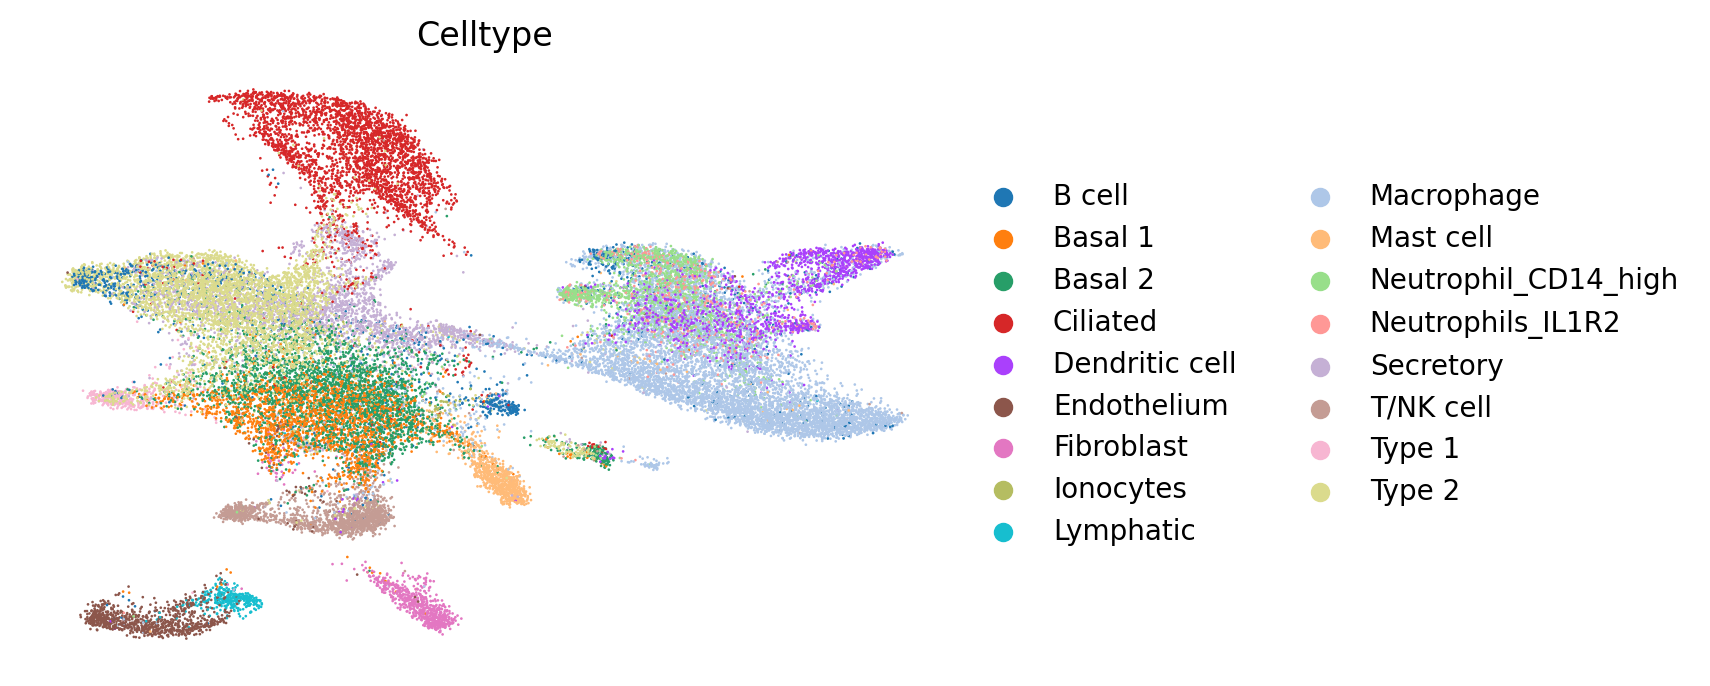

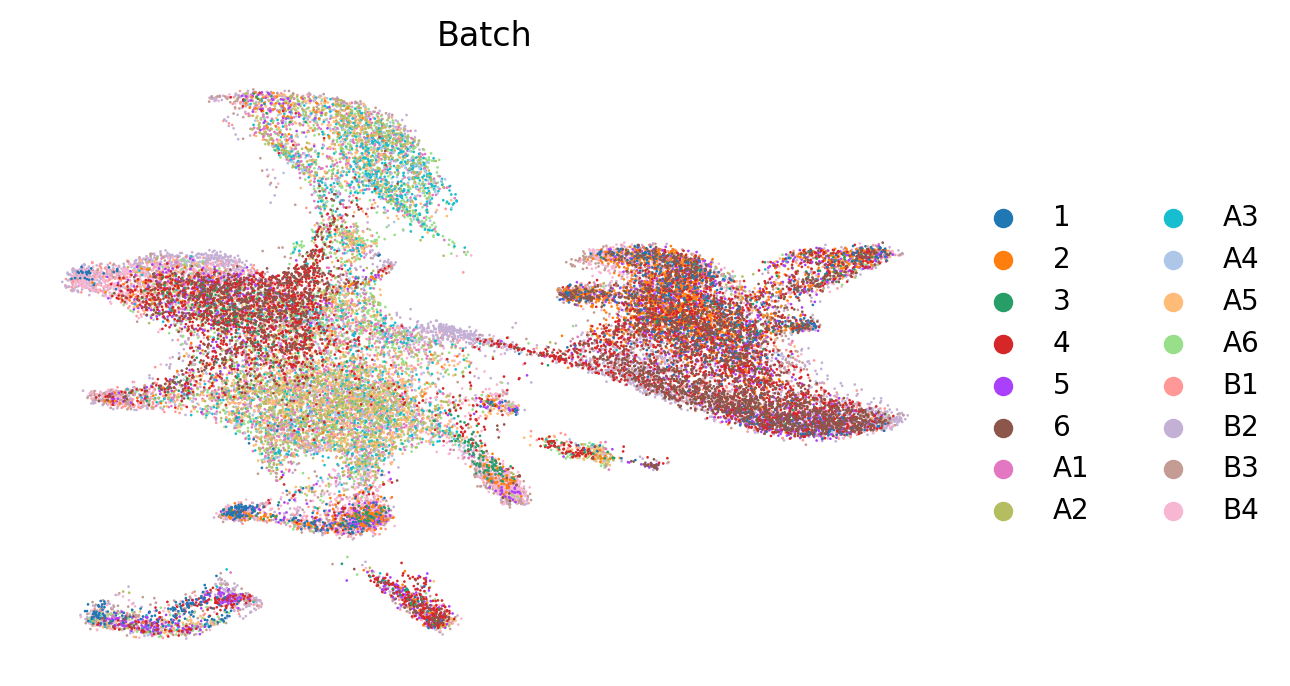

In [34]:
sc.pp.neighbors(adata_int)  # use_rep = 'final_embeddings'
sc.tl.umap(adata_int)
sc.pl.umap(adata_int, color="Celltype", frameon=False)
sc.pl.umap(adata_int, color="Batch", frameon=False)

# scanorama

In [35]:
adata = sc.read_h5ad(methods_path+'scanorama/scanorama-'+dataset+'.h5ad')
adata.obs['Celltype'] = adata.obs[cell_type]
adata.obs['Batch'] = adata.obs[batch]

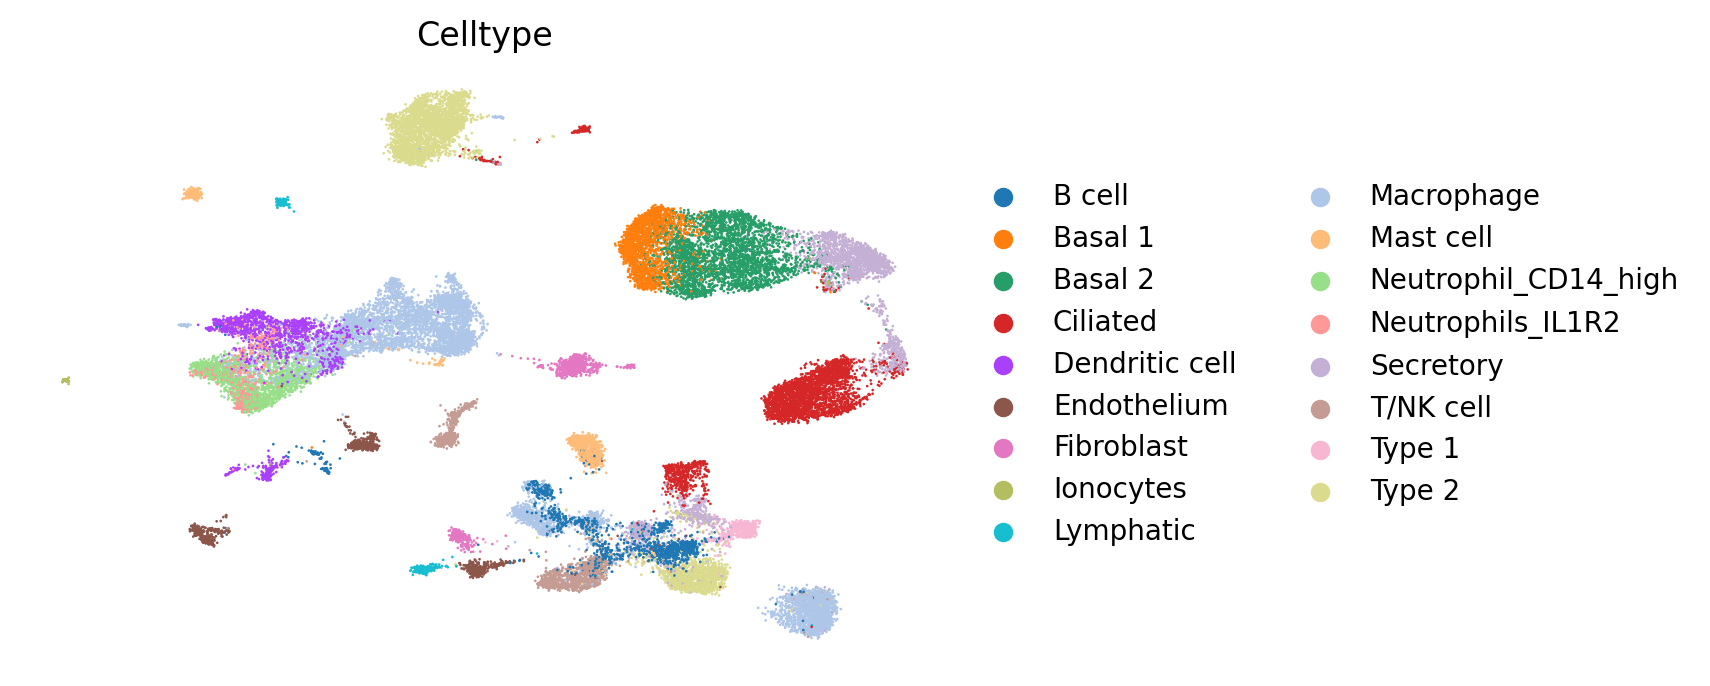

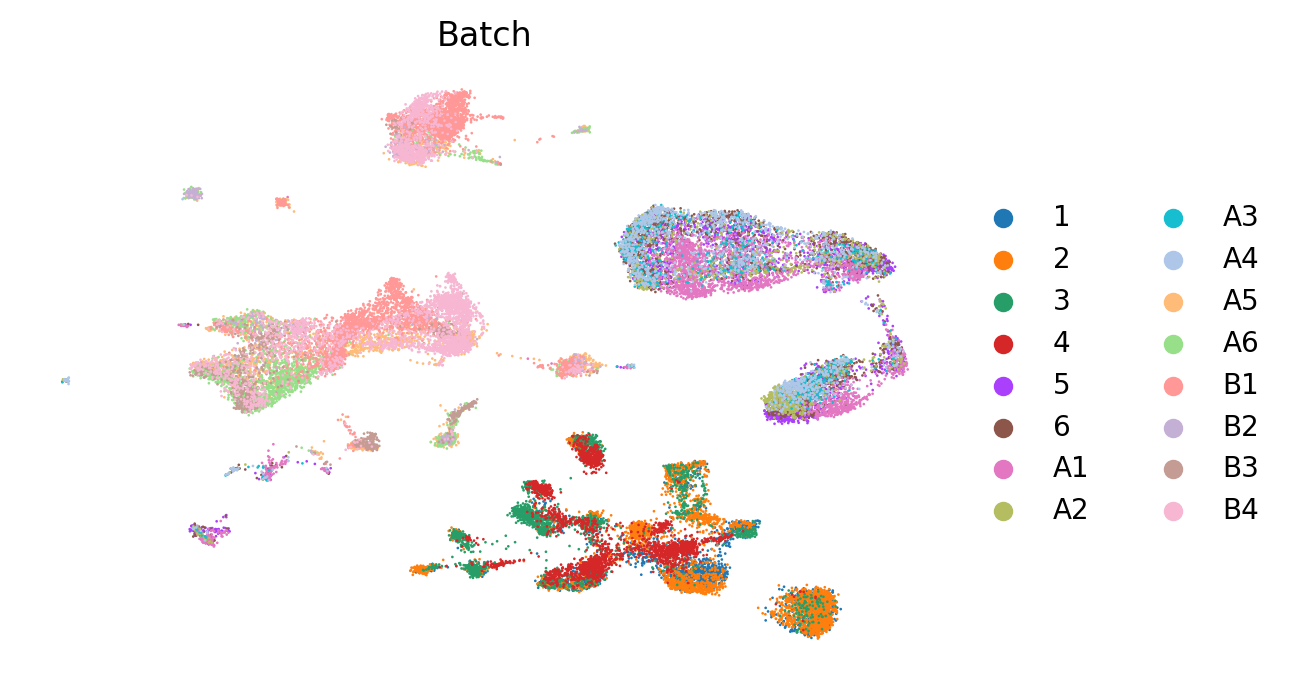

In [36]:
sc.pp.neighbors(adata, use_rep='X_emb')  # use_rep = 'final_embeddings'
sc.tl.umap(adata)
sc.pl.umap(adata, color='Celltype', frameon=False)
sc.pl.umap(adata, color='Batch', frameon=False)